In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\\Users\\veenu\\Datasets\\Insurance_Fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.drop('_c39',axis=1,inplace=True)

In [8]:
df.iloc[:,0:20].head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision


In [9]:
df.iloc[:,20:40].head(10)

,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [10]:
df['incident_type'].value_counts() 

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [11]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [12]:
df.drop(['insured_education_level','insured_hobbies','incident_location','incident_state','incident_city',
        'auto_make','auto_model','auto_year'],axis=1,inplace=True)

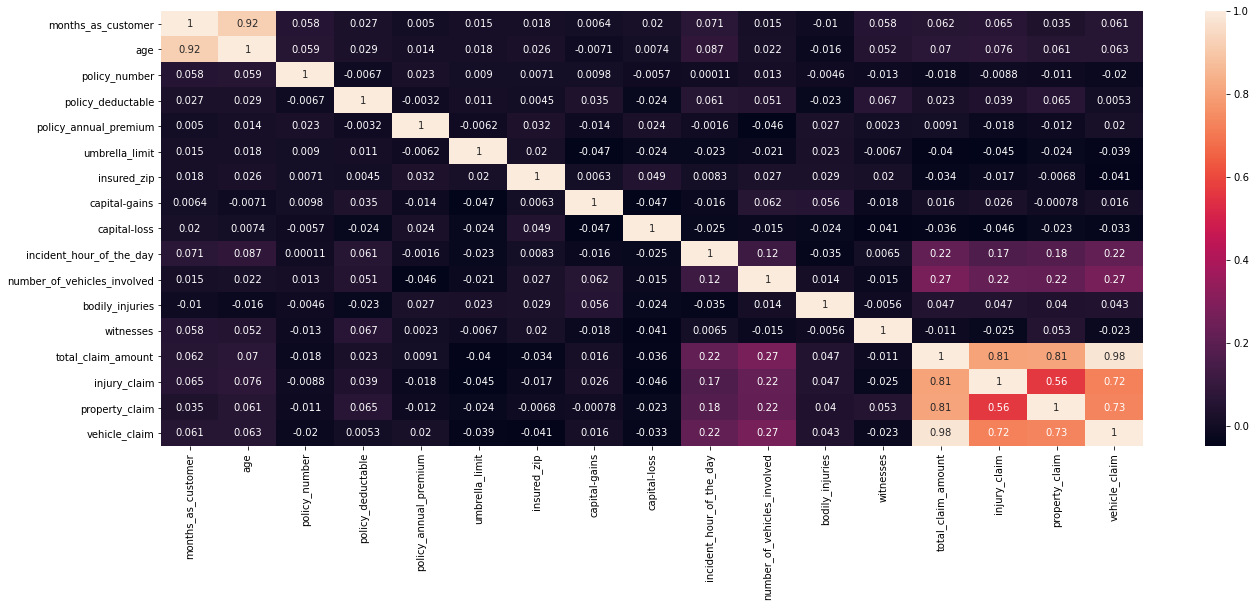

In [13]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(),annot=True)   

In [14]:
df.iloc[:,:16].head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_date
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,craft-repair,husband,53300,0,25-01-2015
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,machine-op-inspct,other-relative,0,0,21-01-2015
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,sales,own-child,35100,0,22-02-2015


In [15]:
df.iloc[:,16:31].head(3)

,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Y
2,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N


In [16]:
# pd=pd.to_datetime(df['policy_bind_date'],for).dt.day
# pm=pd.to_datetime(df['policy_bind_date']).dt.month
# py=pd.to_datetime(df['policy_bind_date']).dt.year
# iD=pd.to_datetime(df['incident_date']).dt.day
# im=pd.to_datetime(df['incident_date']).dt.month
# iy=pd.to_datetime(df['incident_date']).dt.year
# df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [17]:
maxim=1
for i in df['policy_bind_date']:
    if len(i.split('-'))>maxim:
        maxim=len(i.split('-'))
print("maximum values",maxim)

maximum values 3


In [18]:
d1=[]
m1=[]
y1=[]
for i in df['policy_bind_date']:
    try:
        d1.append(i.split('-')[0])
    except:
        d1.append("None")
    try:
        m1.append(i.split('-')[1])
    except:
        m1.append("None")
    try:
        y1.append(i.split('-')[2])
    except:
        y1.append("None")
df['Policy_d']=d1
df['Policy_m']=m1
df['Policy_y']=y1
df.drop('policy_bind_date',axis=1,inplace=True)        

In [19]:
d2=[]
m2=[]
y2=[]
for i in df['incident_date']:
    try:
        d2.append(i.split('-')[0])
    except:
        d2.append("None")
    try:
        m2.append(i.split('-')[1])
    except:
        m2.append("None")
    try:
        y2.append(i.split('-')[2])
    except:
        y2.append("None")
df['incident_d']=d2
df['incident_m']=m2
df['incident_y']=y2
df.drop('incident_date',axis=1,inplace=True)       

In [20]:
df['incident_y'].unique()

array(['2015'], dtype=object)

In [21]:
p3=[]
p4=[]
for i in df['policy_csl']:
    try:
        p3.append(i.split('/')[0])
    except:
        p3.append("None")
    try:
        p4.append(i.split('/')[1])
    except:
        p4.append("None")
df['Policy_csl_claim']=p3
df['Policy_csl_limit']=p4
df.drop('policy_csl',axis=1,inplace=True)

In [22]:
df['collision_type'].replace("?","Other",inplace=True)
df['property_damage'].replace("?","Other",inplace=True)
df['police_report_available'].replace("?","Other",inplace=True)

In [23]:
df.iloc[:,:16].head(3)

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,machine-op-inspct,other-relative,0,0,Vehicle Theft,Other,Minor Damage
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage


In [24]:
df.iloc[:,16:36].head(3)

,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,Policy_d,Policy_m,Policy_y,incident_d,incident_m,incident_y,Policy_csl_claim,Policy_csl_limit
0,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y,17,10,2014,25,01,2015,250,500
1,Police,8,1,Other,0,0,Other,5070,780,780,3510,Y,27,06,2006,21,01,2015,250,500
2,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N,06,09,2000,22,02,2015,100,300


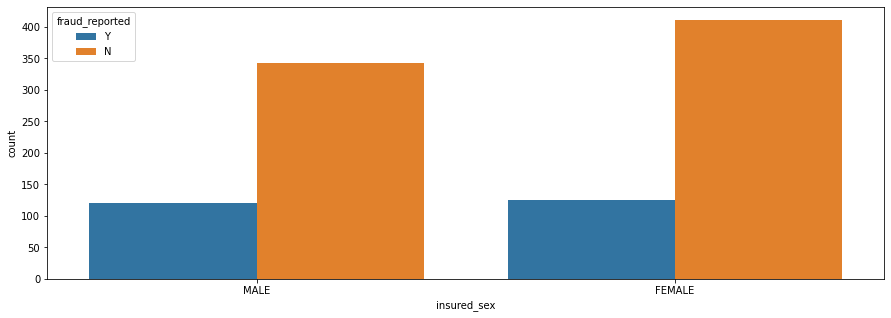

In [25]:
plt.figure(figsize=(15,5))
sns.countplot('insured_sex',data=df,hue='fraud_reported')

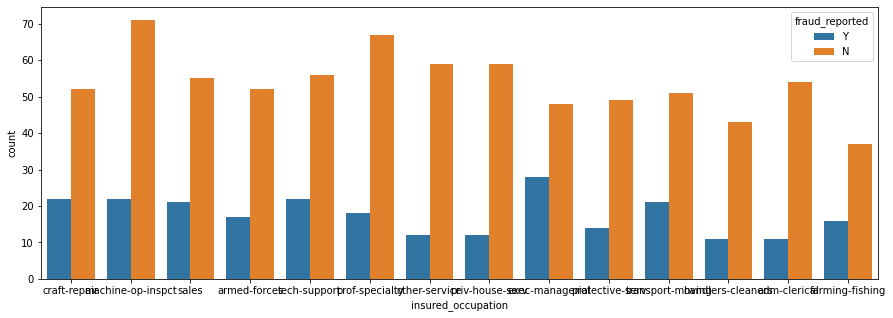

In [26]:
plt.figure(figsize=(15,5))
sns.countplot('insured_occupation',data=df,hue='fraud_reported')

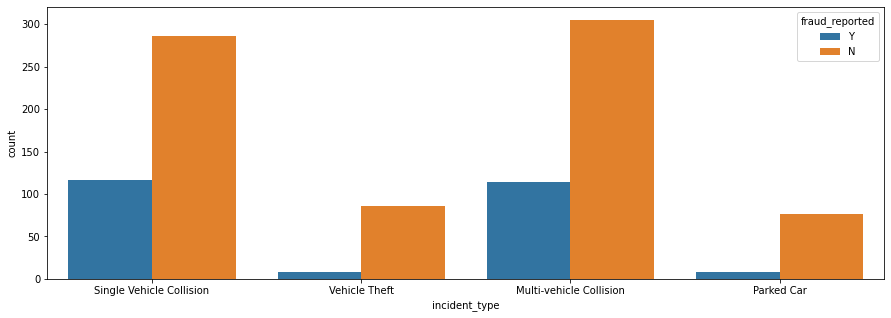

In [27]:
plt.figure(figsize=(15,5))
sns.countplot('incident_type',data=df,hue='fraud_reported')

In [28]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

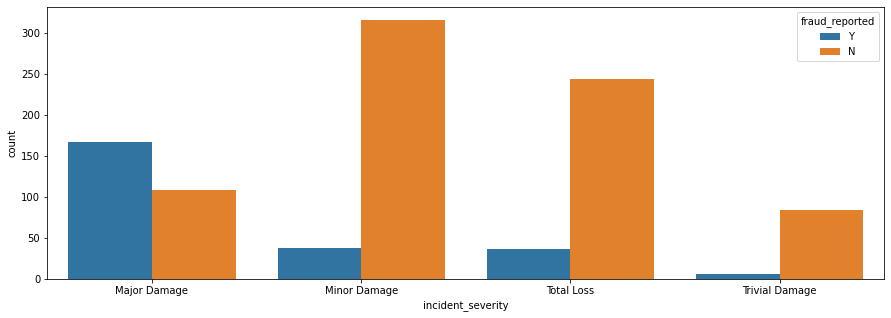

In [29]:
plt.figure(figsize=(15,5))
sns.countplot('incident_severity',data=df,hue='fraud_reported')

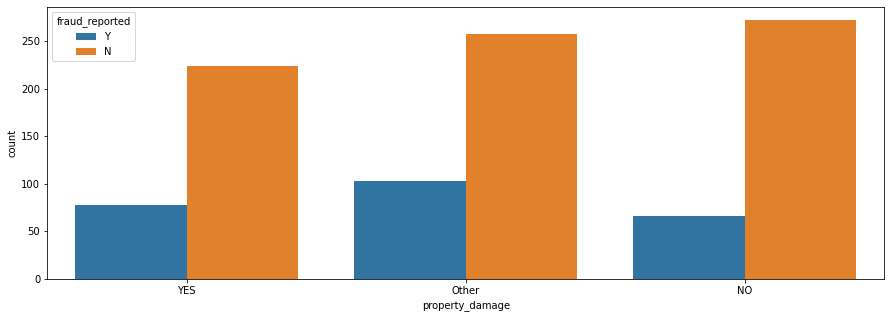

In [30]:
plt.figure(figsize=(15,5))
sns.countplot('property_damage',data=df,hue='fraud_reported')

In [31]:
for i in ['policy_state','insured_sex','insured_occupation','insured_relationship','incident_type','collision_type',
                   'incident_severity','authorities_contacted','property_damage','police_report_available']:

    print((i),":-",len(df[i].value_counts()))

policy_state :- 3
insured_sex :- 2
insured_occupation :- 14
insured_relationship :- 6
incident_type :- 4
collision_type :- 4
incident_severity :- 4
authorities_contacted :- 5
property_damage :- 3
police_report_available :- 3


In [32]:
df2=pd.get_dummies(df,columns=['policy_state','insured_sex','insured_relationship','incident_type','collision_type',
                   'incident_severity','authorities_contacted','property_damage','police_report_available'])
df.drop(['policy_state','insured_sex','insured_relationship','incident_type','collision_type',
                   'incident_severity','authorities_contacted','property_damage','police_report_available'],axis=1,inplace=True)

In [33]:
df3=pd.concat([df,df2],axis=1)

In [34]:
df3

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_occupation,capital-gains,capital-loss,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_Other,property_damage_YES,police_report_available_NO,police_report_available_Other,police_report_available_YES
0,328,48,521585,1000,1406.91,0,466132,craft-repair,53300,0,...,0,0,0,1,0,0,1,0,0,1
1,228,42,342868,2000,1197.22,5000000,468176,machine-op-inspct,0,0,...,0,0,0,1,0,1,0,0,1,0
2,134,29,687698,2000,1413.14,5000000,430632,sales,35100,0,...,0,0,0,1,1,0,0,1,0,0
3,256,41,227811,2000,1415.74,6000000,608117,armed-forces,48900,-62400,...,0,0,0,1,0,1,0,1,0,0
4,228,44,367455,1000,1583.91,6000000,610706,sales,66000,-46000,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,craft-repair,0,0,...,1,0,0,0,0,0,1,0,1,0
996,285,41,186934,1000,1436.79,0,608177,prof-specialty,70900,0,...,1,0,0,0,0,0,1,0,1,0
997,130,34,918516,500,1383.49,3000000,442797,armed-forces,35100,0,...,0,0,0,1,0,1,0,0,0,1
998,458,62,533940,2000,1356.92,5000000,441714,handlers-cleaners,0,0,...,0,0,1,0,0,1,0,0,0,1


In [35]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['insured_occupation']=lb.fit_transform(df['insured_occupation'])
df['fraud_reported']=lb.fit_transform(df['fraud_reported'])

In [36]:
X=df.drop('fraud_reported',axis=1)

In [37]:
Y=df['fraud_reported']

# Model Generation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu,"on Random State",maxRS)

Best accuracy is 0.8 on Random State 1


In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=1)
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)
pred=lg.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.7366666666666667
[[220   0]
 [ 79   1]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       220
           1       1.00      0.01      0.02        80

    accuracy                           0.74       300
   macro avg       0.87      0.51      0.44       300
weighted avg       0.81      0.74      0.63       300



In [41]:
# from sklearn.svm import SVC
# sv=SVC(kernel='linear')
# sv.fit(X_train,Y_train)
# pred=sv.predict(X_test)
# print(accuracy_score(Y_test,pred))
# print(confusion_matrix(Y_test,pred))
# print(classification_report(Y_test,pred))

In [42]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
pred=ad.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.6966666666666667
[[202  18]
 [ 73   7]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       220
           1       0.28      0.09      0.13        80

    accuracy                           0.70       300
   macro avg       0.51      0.50      0.47       300
weighted avg       0.61      0.70      0.63       300



In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.6333333333333333
[[167  53]
 [ 57  23]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       220
           1       0.30      0.29      0.29        80

    accuracy                           0.63       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.63      0.63      0.63       300



In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.67
[[198  22]
 [ 77   3]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       220
           1       0.12      0.04      0.06        80

    accuracy                           0.67       300
   macro avg       0.42      0.47      0.43       300
weighted avg       0.56      0.67      0.60       300



In [45]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# paramaters = {'kernel':['linear','rbf'],'C':[1,10]}
# svc=svm.SVC()
# clf=GridSearchCV(svc,paramaters)
# clf.fit(X_train,Y_train)
# clf 

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()

grid_param={ 'criterion':['gini','entropy']}

#gridk={'kernel':['linear','rbf','poly']}

gd_sr=GridSearchCV(estimator=dt,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(X_train,Y_train)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_re=gd_sr.best_score_
print(best_re)

{'criterion': 'gini'}
0.6699999999999999


In [47]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)

1.0

# ROC_AUC

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
y_pred_prob=lg.predict_proba(X_test)[:,1]
y_pred_prob

array([0.13667891, 0.1450563 , 0.17090647, 0.28177376, 0.10446257,
       0.24655023, 0.42652034, 0.24922817, 0.23812146, 0.28671381,
       0.31009536, 0.11058807, 0.26297176, 0.25817568, 0.21357134,
       0.26966006, 0.20446476, 0.23359691, 0.22107059, 0.22896656,
       0.1023411 , 0.34811933, 0.29851536, 0.28335702, 0.20771407,
       0.33501106, 0.22511172, 0.23619156, 0.36160082, 0.38286759,
       0.23766629, 0.38009558, 0.33957485, 0.17574587, 0.24845037,
       0.17641064, 0.13904081, 0.19151046, 0.28587727, 0.17014247,
       0.29386275, 0.23999627, 0.35296046, 0.2802593 , 0.26879859,
       0.27185458, 0.23103217, 0.34158555, 0.18257346, 0.29358678,
       0.31098753, 0.17907637, 0.24248113, 0.26940659, 0.33692134,
       0.31202063, 0.19169336, 0.16820124, 0.28291738, 0.16230615,
       0.24582617, 0.34799926, 0.1348211 , 0.32947023, 0.17332308,
       0.33284209, 0.29855493, 0.27143006, 0.36559612, 0.34447371,
       0.2977082 , 0.23944102, 0.32704093, 0.18935033, 0.30828

In [50]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)

In [51]:
fpr

array([0.        , 0.        , 0.        , 0.06363636, 0.06363636,
       0.07727273, 0.07727273, 0.08636364, 0.08636364, 0.09545455,
       0.09545455, 0.1       , 0.1       , 0.10454545, 0.10454545,
       0.13181818, 0.13181818, 0.13636364, 0.13636364, 0.14545455,
       0.14545455, 0.15      , 0.15      , 0.16363636, 0.16363636,
       0.16818182, 0.16818182, 0.18181818, 0.18181818, 0.19090909,
       0.19090909, 0.20454545, 0.20454545, 0.21363636, 0.21363636,
       0.23181818, 0.23181818, 0.23636364, 0.23636364, 0.24545455,
       0.24545455, 0.25909091, 0.25909091, 0.26818182, 0.26818182,
       0.27272727, 0.27272727, 0.28636364, 0.28636364, 0.29545455,
       0.29545455, 0.32272727, 0.32272727, 0.35      , 0.35      ,
       0.37727273, 0.37727273, 0.41818182, 0.41818182, 0.42272727,
       0.42272727, 0.42727273, 0.42727273, 0.44545455, 0.44545455,
       0.45454545, 0.45454545, 0.49090909, 0.49090909, 0.54090909,
       0.54090909, 0.54545455, 0.54545455, 0.58181818, 0.58181

In [52]:
tpr

array([0.    , 0.0125, 0.0375, 0.0375, 0.0625, 0.0625, 0.075 , 0.075 ,
       0.1   , 0.1   , 0.125 , 0.125 , 0.1375, 0.1375, 0.15  , 0.15  ,
       0.175 , 0.175 , 0.2125, 0.2125, 0.225 , 0.225 , 0.2375, 0.2375,
       0.25  , 0.25  , 0.275 , 0.275 , 0.2875, 0.2875, 0.3125, 0.3125,
       0.325 , 0.325 , 0.3375, 0.3375, 0.35  , 0.35  , 0.3625, 0.3625,
       0.375 , 0.375 , 0.3875, 0.3875, 0.4125, 0.4125, 0.425 , 0.425 ,
       0.4375, 0.4375, 0.4625, 0.4625, 0.475 , 0.475 , 0.5125, 0.5125,
       0.525 , 0.525 , 0.5375, 0.5375, 0.5625, 0.5625, 0.575 , 0.575 ,
       0.5875, 0.5875, 0.6   , 0.6   , 0.625 , 0.625 , 0.675 , 0.675 ,
       0.6875, 0.6875, 0.7   , 0.7   , 0.725 , 0.725 , 0.7375, 0.7375,
       0.75  , 0.75  , 0.7625, 0.7625, 0.775 , 0.775 , 0.8   , 0.8   ,
       0.8125, 0.8125, 0.825 , 0.825 , 0.8375, 0.8375, 0.85  , 0.85  ,
       0.8625, 0.8625, 0.875 , 0.875 , 0.8875, 0.8875, 0.9   , 0.9   ,
       0.925 , 0.925 , 0.9375, 0.9375, 0.9625, 0.9625, 0.975 , 0.975 ,
      

In [53]:
thresholds

array([1.50158383, 0.50158383, 0.42652034, 0.35296046, 0.34956051,
       0.34799926, 0.34523256, 0.34396066, 0.34158555, 0.34055483,
       0.33888965, 0.33836005, 0.33692134, 0.33501106, 0.33284209,
       0.32832085, 0.32704093, 0.32553552, 0.3220929 , 0.31888321,
       0.31832529, 0.31797186, 0.31760851, 0.31259644, 0.31223411,
       0.31202063, 0.31052468, 0.30850618, 0.30828759, 0.30390909,
       0.30175346, 0.29851536, 0.2977082 , 0.29603417, 0.29386275,
       0.29087989, 0.29033065, 0.29027546, 0.28993277, 0.28803313,
       0.28673328, 0.28541315, 0.28419501, 0.28291738, 0.28177376,
       0.28099263, 0.28080937, 0.27902982, 0.27822555, 0.27377886,
       0.27185458, 0.26966006, 0.26940659, 0.26605944, 0.26484816,
       0.25851434, 0.25845123, 0.24922817, 0.24845037, 0.24685524,
       0.24608781, 0.24584026, 0.24582617, 0.24293316, 0.24270974,
       0.24248113, 0.23999627, 0.23567006, 0.2353179 , 0.22842249,
       0.22511172, 0.22484961, 0.22438653, 0.22126589, 0.22107

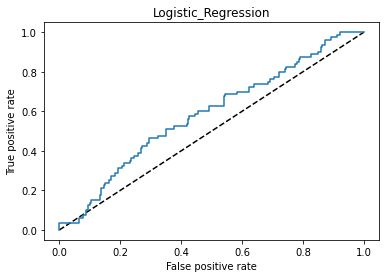

In [54]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic_Regression')
plt.show()

In [55]:
auc_score=roc_auc_score(Y_test,lg.predict(X_test))

In [56]:
auc_score

0.50625

# Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
dtscores=cross_val_score(dtc,X,Y,cv=5)
print(dtscores)
print(dtscores.mean())

[0.62  0.6   0.56  0.675 0.64 ]
0.619


In [58]:
rfscores=cross_val_score(mod,X,Y,cv=10)
print(rfscores)
print(rfscores.mean(),rfscores.std()) 

[0.73 0.74 0.75 0.75 0.72 0.76 0.74 0.76 0.75 0.76]
0.7459999999999999 0.012806248474865708


In [59]:
lgscores=cross_val_score(lg,X,Y,cv=5)
print(lgscores)
print(lgscores.mean())

[0.75  0.755 0.74  0.755 0.755]
0.751


# Conclusion :The Best Model is RandomForestClassifier

In [60]:
import pickle
filename='Insurance_fraud.pkl'
pickle.dump(mod,open(filename,'wb'))